In [2]:
using BasisFunctions
using FrameFuns
using Interact, Reactive
using PyPlot

### One-dimensional approximations

In [3]:
B = FourierBasis(61)
D = Interval(-0.5,0.5)
f1(x) = cos(3*x)
F1 = Fun(f1,B,D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


You can evaluate the fun like an ordinary function:

In [4]:
F1(0.5)

0.07073720166772596 - 8.982259380729829e-13im

In [5]:
f1(0.5)

0.0707372016677029

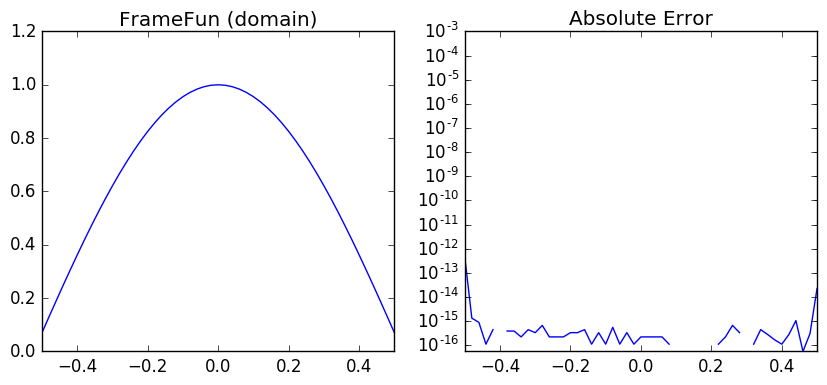

In [7]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot(F1,n=100)
subplot(122); FrameFuns.plot_error(F1,f1,n=100);

In [8]:
B2 = ChebyshevBasis(130)
D = Interval()/2
f2(x) = cos(80*x)
F2 = Fun(f2, B2, D)

A 1-dimensional FrameFun with 130 degrees of freedom.
Basis: Chebyshev series (first kind)
Domain: the interval [-0.5, 0.5]


In [9]:
F2(0.1)

-0.14550003380855414

In [10]:
f2(0.1)

-0.14550003380861354

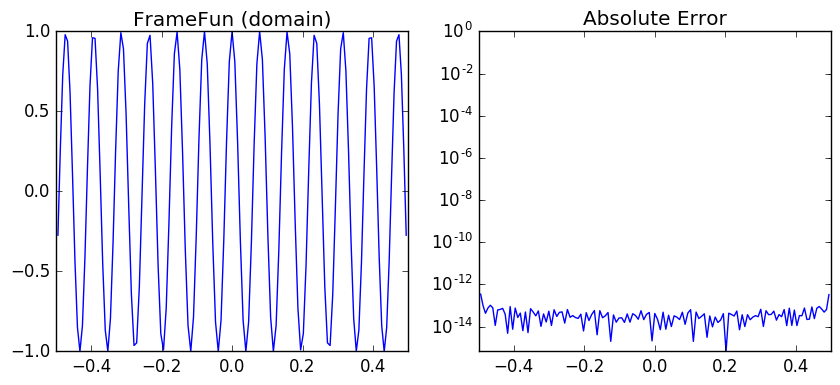

In [11]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot(F2,n=401)
subplot(122); FrameFuns.plot_error(F2,f2,n=401);

In [12]:
f3(x) = cos(10*x.^2)
B = FourierBasis(41)
D = Interval(-1.0,-0.5)+Interval(-0.2,0.5)
F3 = Fun(f3,B,D)

A 1-dimensional FrameFun with 41 degrees of freedom.
Basis: Fourier series
Domain: a union of two domains: 
    First domain: the interval [-1.0, -0.5]
    Second domain: the interval [-0.2, 0.5]



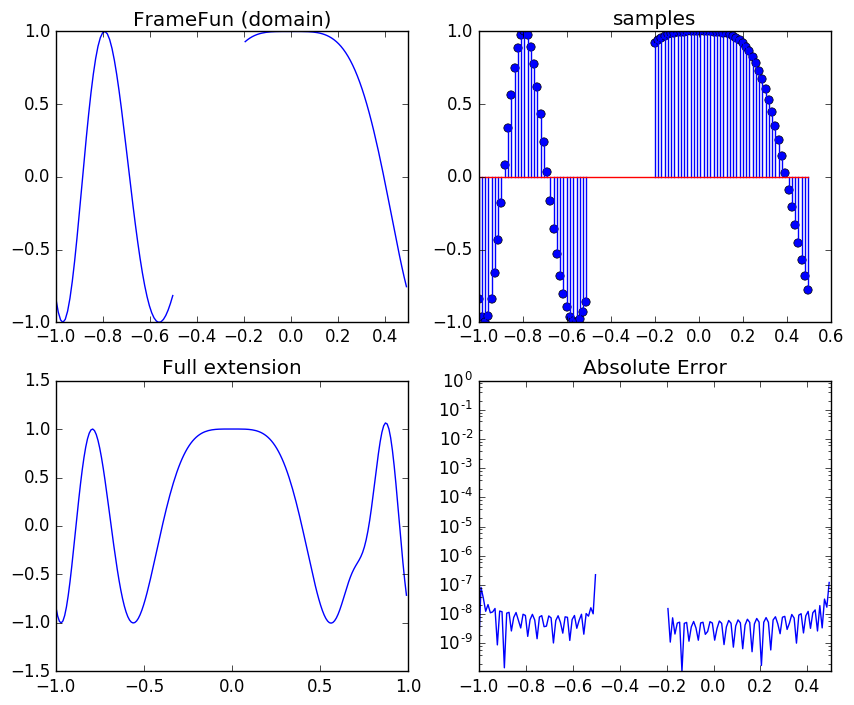

PyObject <matplotlib.text.Text object at 0x7f84dd13a350>

In [13]:
figure(figsize=(10,8))
subplot(221); FrameFuns.plot(F3)
subplot(222); FrameFuns.plot_samples(F3)
subplot(223); FrameFuns.plot_extension(F3)
subplot(224); FrameFuns.plot_error(F3,f3)

### High precision

In [14]:
B = FourierBasis(61,Complex{BigFloat})
D = Interval(-0.5,0.5)
fh(x) = x
Fh = Fun(fh,B,D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


In [15]:
pt = 3//10
abs(Fh(pt)-fh(pt))

2.584111848262430378804644823040549609369627628935470184144389555645674067714454e-26

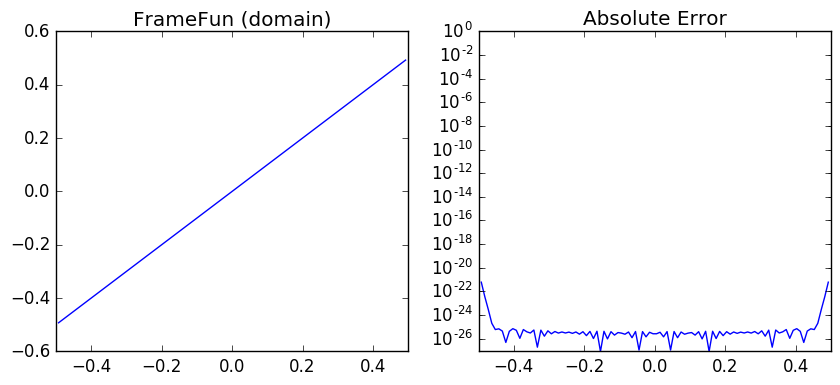

In [16]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot(Fh)
subplot(122); FrameFuns.plot_error(Fh,fh);

### 2D approximations

##### Simple domains and simple functions

In [17]:
C = Disk() - (Disk(0.3)+[0.2; 0.5])

the difference of two domains: 
    First domain: a disk of radius 1 centered at [0.0,0.0]
    Second domain: a disk of radius 0.3 centered at [0.2,0.5]


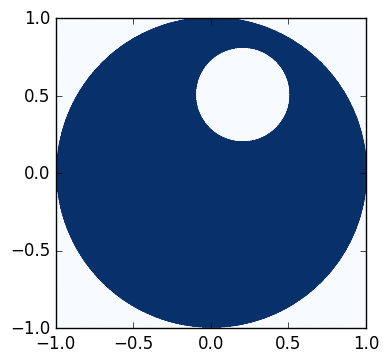

In [18]:
figure(figsize=(4,4))
plot(C);

In [19]:
B = FourierBasis(41,-1.3,1.3) ⊗ FourierBasis(41,-1.3,1.3)
f(x,y) = exp(y+x)
F = Fun(f,B,C)

A 2-dimensional FrameFun with 1681 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.3  ,  1.3 ] x Fourier series, mapped to [ -1.3  ,  1.3 ])
Domain: the difference of two domains: 
    First domain: a disk of radius 1 centered at [0.0,0.0]
    Second domain: a disk of radius 0.3 centered at [0.2,0.5]



In [20]:
F(-0.6,0.4)

0.8187307572225109 + 1.7462298274040222e-9im

In [21]:
f(-0.6, 0.4)

0.8187307530779819

In [22]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot(F)
subplot(122); FrameFuns.plot_error(F,f);

LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.AttributeError'>
AttributeError("'list' object has no attribute 'shape'",)
  File "/home/daan/local/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3093, in pcolormesh
    ret = ax.pcolormesh(*args, **kwargs)
  File "/home/daan/local/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py", line 1811, in inner
    return func(ax, *args, **kwargs)
  File "/home/daan/local/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 5391, in pcolormesh
    X, Y, C = self._pcolorargs('pcolormesh', *args, allmatch=allmatch)
  File "/home/daan/local/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 4996, in _pcolorargs
    Nx = X.shape[-1]

while loading In[22], in expression starting on line 2

##### Simple domains and harder functions

In [27]:
dom = FrameFuns.randomcircles(8)

a collection of 8 domains

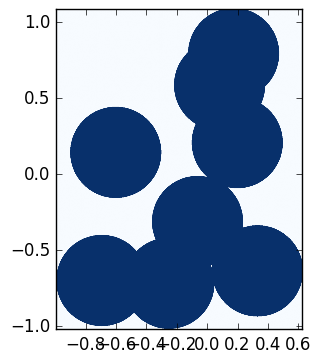

In [28]:
figure(figsize=(4,4))
FrameFuns.plot(dom);

In [29]:
B = FourierBasis(45) ⊗ ChebyshevBasis(45)
f(x,y) = cos(20*x+22*y)
F = Fun(f,B,dom)

A 2-dimensional FrameFun with 2025 degrees of freedom.
Basis: tensor product (Fourier series x Chebyshev series (first kind))
Domain: a collection of 8 domains


In [30]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot(F)
subplot(122); FrameFuns.plot_error(F,f)

LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.AttributeError'>
AttributeError("'list' object has no attribute 'shape'",)
  File "/home/daan/local/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3093, in pcolormesh
    ret = ax.pcolormesh(*args, **kwargs)
  File "/home/daan/local/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py", line 1811, in inner
    return func(ax, *args, **kwargs)
  File "/home/daan/local/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 5391, in pcolormesh
    X, Y, C = self._pcolorargs('pcolormesh', *args, allmatch=allmatch)
  File "/home/daan/local/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 4996, in _pcolorargs
    Nx = X.shape[-1]

while loading In[30], in expression starting on line 2

##### Fractal domains

In [38]:
mandelbrot=FrameFuns.Mandelbrot()

The Mandelbrot set

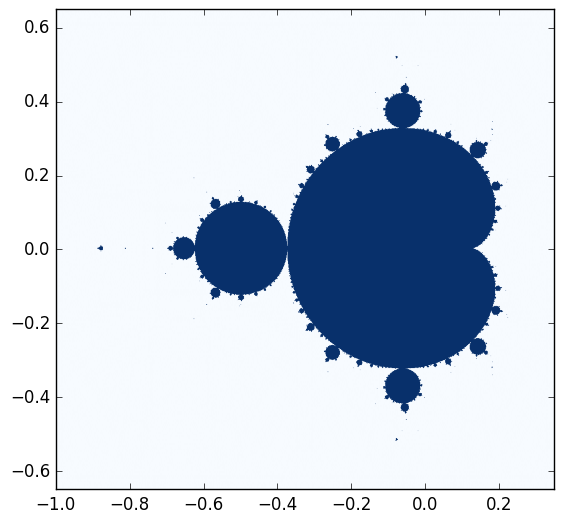

PyObject <matplotlib.image.AxesImage object at 0x3229ca050>

In [39]:
plot(mandelbrot)

In [40]:
B = FourierBasis(31,-1.0,0.35) ⊗ FourierBasis(31,-0.65,0.65)
f(x,y) = cos(10*x*y)
F = Fun(f, B, mandelbrot)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.0  ,  0.35 ] x Fourier series, mapped to [ -0.65  ,  0.65 ])
Domain: The Mandelbrot set


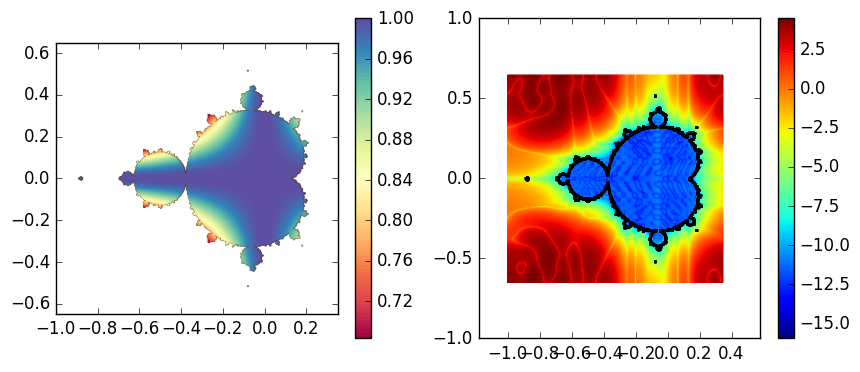

PyObject <matplotlib.colorbar.Colorbar object at 0x321629190>

In [41]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot(F)
subplot(122); FrameFuns.plot_error(F,f)